# Content

6. EDA <br>

# 6. EDA

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Load csv file
df_train_clean = pd.read_csv("../Dataset/train_clean.csv")

Take a look at the correlation of numeric variables to saleprice - to take variables with correlation > 0.5 or < -0.5

In [2]:
df_train_clean.corr()['saleprice'].sort_values(ascending = False)

saleprice          1.000000
overall_qual       0.800439
gr_liv_area        0.697411
garage_area        0.650024
garage_cars        0.647909
total_bsmt_sf      0.630275
first_flr_sf       0.618629
year_built         0.571658
year_remod_add     0.550275
full_bath          0.538385
totrms_abvgrd      0.504040
mas_vnr_area       0.503252
fireplaces         0.471084
bsmtfin_sf_1       0.424198
open_porch_sf      0.334445
wood_deck_sf       0.327403
lot_frontage       0.324659
lot_area           0.296664
half_bath          0.283983
bsmt_full_bath     0.283322
garage_yr_blt      0.258769
second_flr_sf      0.249555
bsmt_unf_sf        0.189244
bedroom_abvgr      0.137301
screen_porch       0.134942
three_ssn_porch    0.048857
mo_sold            0.031870
pool_area          0.023179
bsmtfin_sf_2       0.014908
misc_val          -0.007294
yr_sold           -0.016151
low_qual_fin_sf   -0.041515
bsmt_half_bath    -0.045080
id                -0.050346
ms_subclass       -0.086619
overall_cond      -0

These variables have been shortlisted based on the correlation with saleprice (>0.5): <br>
1. overall_qual:       0.800439 <br>
2. gr_liv_area:        0.697411 <br>
3. garage_area:        0.650024 <br>
4. garage_cars:        0.647909 <br>
5. total_bsmt_sf:      0.630275 <br>
6. first_flr_sf:         0.618629 <br>
7. year_built:         0.571658 <br>
8. year_remod_add:     0.550275 <br>
9. full_bath:          0.538385 <br>
10. totrms_abvgrd:    0.504040 <br>
11. mas_vnr_area:      0.503252 <br>

Take a look at the heat map of these variables with saleprice

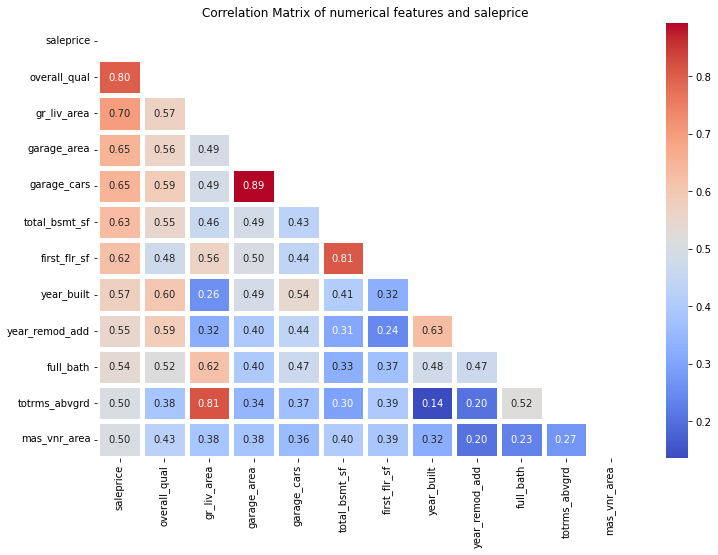

In [3]:
df_train_heatmap = df_train_clean.filter(['saleprice', 'overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', 'first_flr_sf', 'year_built', 'year_remod_add', 'full_bath', 'totrms_abvgrd', 'mas_vnr_area'], axis=1)

matrix = np.triu(df_train_heatmap.corr())
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Correlation Matrix of numerical features and saleprice')
sns.heatmap(df_train_heatmap.corr(), cmap = 'coolwarm', linewidths = 5, fmt = '.2f',annot = True, mask = matrix);

Based on the heat map, we can see that the correlation between <br>
garage_cars and garage area <br>
first_flr_sf and total_bsmt_sf <br>
year_remod_add and year_built <br>
is higher than their own correlation with saleprice. <br><br>
We want to pick variables where the correlation of variables to saleprice is > 0.5 and the correlation to other variables is not more than the correlation with saleprice.

Take a look at the individual variables' correlation with other numerical variables

1. overall_qual: to keep feature for modelling

In [4]:
df_train_clean.corr()['overall_qual'].sort_values(ascending = False).head(10)

overall_qual      1.000000
saleprice         0.800439
year_built        0.602928
garage_cars       0.586780
year_remod_add    0.585149
gr_liv_area       0.567387
garage_area       0.563150
total_bsmt_sf     0.549231
full_bath         0.516919
first_flr_sf      0.476326
Name: overall_qual, dtype: float64

2. gr_liv_area: to keep feature for modelling as the correlation of 0.697 with saleprice is higher than the correlation of totalrms_abvgr and saleprice (0.504)

In [5]:
df_train_clean.corr()['gr_liv_area'].sort_values(ascending = False).head(10)

gr_liv_area      1.000000
totrms_abvgrd    0.813674
saleprice        0.697411
second_flr_sf    0.639471
full_bath        0.617977
overall_qual     0.567387
first_flr_sf     0.563351
bedroom_abvgr    0.507778
garage_area      0.491422
garage_cars      0.486825
Name: gr_liv_area, dtype: float64

3. garage_area: to keep feature for modelling as the correlation of 0.650 with saleprice is higher than the correlation of garage_cars and saleprice (0.648)

In [6]:
df_train_clean.corr()['garage_area'].sort_values(ascending = False).head(10)

garage_area       1.000000
garage_cars       0.892915
saleprice         0.650024
overall_qual      0.563150
garage_yr_blt     0.555177
first_flr_sf      0.498241
gr_liv_area       0.491422
total_bsmt_sf     0.487563
year_built        0.486392
year_remod_add    0.398043
Name: garage_area, dtype: float64

4. garage_cars: to drop feature as we have chosen to keep garage_area

In [7]:
df_train_clean.corr()['garage_cars'].sort_values(ascending = False).head(10)

garage_cars       1.000000
garage_area       0.892915
saleprice         0.647909
garage_yr_blt     0.587037
overall_qual      0.586780
year_built        0.541878
gr_liv_area       0.486825
full_bath         0.467378
year_remod_add    0.440958
first_flr_sf      0.438465
Name: garage_cars, dtype: float64

5. total_bsmt_sf: to keep feature for modelling as the correlation of 0.630 with saleprice is higher than the correlation of first_flr_sf and saleprice (0.619)

In [8]:
df_train_clean.corr()['total_bsmt_sf'].sort_values(ascending = False).head(10)

total_bsmt_sf    1.000000
first_flr_sf     0.810229
saleprice        0.630275
overall_qual     0.549231
bsmtfin_sf_1     0.539908
garage_area      0.487563
gr_liv_area      0.456702
garage_cars      0.432114
bsmt_unf_sf      0.417072
year_built       0.410995
Name: total_bsmt_sf, dtype: float64

6. first_flr_sf: to drop feature as we have chosen to keep total_bsmt_sf

In [9]:
df_train_clean.corr()['first_flr_sf'].sort_values(ascending = False).head(10)

first_flr_sf     1.000000
total_bsmt_sf    0.810229
saleprice        0.618629
gr_liv_area      0.563351
garage_area      0.498241
overall_qual     0.476326
bsmtfin_sf_1     0.462360
garage_cars      0.438465
lot_frontage     0.428192
totrms_abvgrd    0.394325
Name: first_flr_sf, dtype: float64

7. year_built: to drop feature as we have chosen to keep overall_qual

In [10]:
df_train_clean.corr()['year_built'].sort_values(ascending = False).head(10)

year_built        1.000000
year_remod_add    0.629387
overall_qual      0.602928
saleprice         0.571658
garage_cars       0.541878
garage_area       0.486392
full_bath         0.480031
total_bsmt_sf     0.410995
first_flr_sf      0.323534
mas_vnr_area      0.320330
Name: year_built, dtype: float64

8. year_remod_add: to drop feature as we have chosen to keep overall_qual

In [11]:
df_train_clean.corr()['year_remod_add'].sort_values(ascending = False).head(10)

year_remod_add    1.000000
year_built        0.629387
overall_qual      0.585149
saleprice         0.550275
full_bath         0.470398
garage_cars       0.440958
garage_area       0.398043
gr_liv_area       0.322052
total_bsmt_sf     0.309873
open_porch_sf     0.265937
Name: year_remod_add, dtype: float64

9. full_bath: to drop feature as we have chosen to keep gr_liv_area

In [12]:
df_train_clean.corr()['full_bath'].sort_values(ascending = False).head(10)

full_bath         1.000000
gr_liv_area       0.617977
saleprice         0.538385
totrms_abvgrd     0.519634
overall_qual      0.516919
year_built        0.480031
year_remod_add    0.470398
garage_cars       0.467378
garage_area       0.397859
second_flr_sf     0.382526
Name: full_bath, dtype: float64

10. totrms_abvgrd: to drop feature as we have chosen to keep gr_liv_area

In [13]:
df_train_clean.corr()['totrms_abvgrd'].sort_values(ascending = False).head(10)

totrms_abvgrd    1.000000
gr_liv_area      0.813674
bedroom_abvgr    0.655583
second_flr_sf    0.575742
full_bath        0.519634
saleprice        0.504040
first_flr_sf     0.394325
overall_qual     0.382746
garage_cars      0.368372
garage_area      0.341586
Name: totrms_abvgrd, dtype: float64

11. mas_vnr_area: to keep feature for modelling

In [14]:
df_train_clean.corr()['mas_vnr_area'].sort_values(ascending = False).head(10)

mas_vnr_area     1.000000
saleprice        0.503252
overall_qual     0.429127
total_bsmt_sf    0.402979
first_flr_sf     0.385714
gr_liv_area      0.384141
garage_area      0.379710
garage_cars      0.355786
year_built       0.320330
bsmtfin_sf_1     0.318791
Name: mas_vnr_area, dtype: float64

Numerical Variables to include into the list of features for modelling: <br>
1. overall_qual <br>
2. gr_liv_area <br>
3. garage_area <br>
4. total_bsmt_sf <br>
5. mas_vnr_area <br>

Plot pairplot of the selected features and saleprice

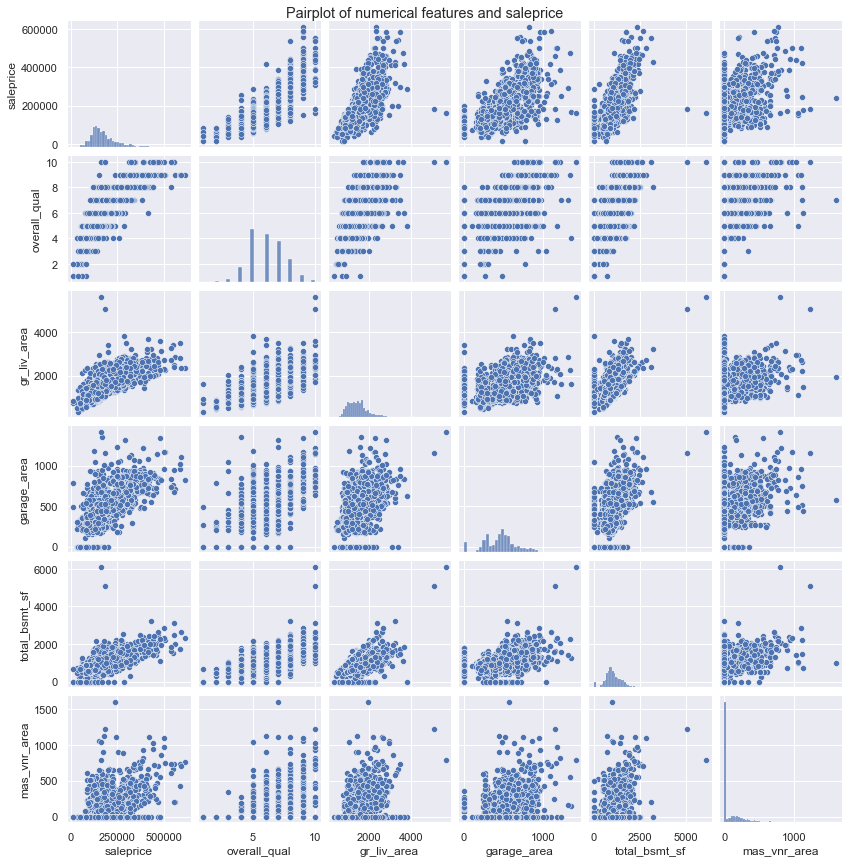

In [15]:
sns.set()
columns = ['saleprice', 'overall_qual', 'gr_liv_area', 'garage_area', 'total_bsmt_sf', 'mas_vnr_area']
df_train_pairplot = sns.pairplot(df_train_clean[columns], diag_kind="hist", size=2)
df_train_pairplot.fig.suptitle("Pairplot of numerical features and saleprice", y=1.00);

The pairplot of the numerical variables and saleprice generally assumes a straight line with a positive gradient with a couple of outliers seen in each plot. In general, an increase in the overall quality or area of the house would drive up saleprice and this makes sense. Outliers will not be removed to mimic real-life scenarios of outliers in datasets.<br>

We will drop mas_vnr_area as the occurence at zero forms the largest propotion of the dataset. <br>

gr_liv_area is positively skewed. We can try to apply log transformation on it. <br>
garage_area and total_bsmt_sf is positively skewed with 0 values > we will not log transform these variables.

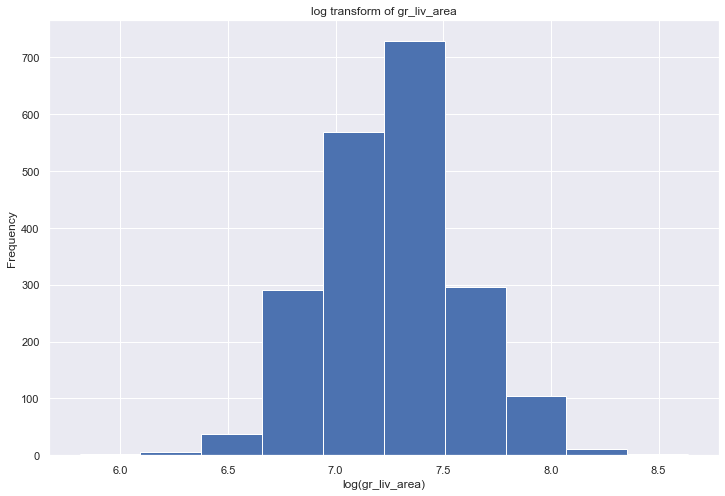

In [16]:
plt.hist(np.log(df_train_clean['gr_liv_area']))
plt.title('log transform of gr_liv_area')
plt.xlabel('log(gr_liv_area)')
plt.ylabel('Frequency')
plt.show;

We can see that after the log transformation, gr_liv_area assumes more like a normal distribution.

Save log gr_liv_area variable into log_gr_liv_area

In [17]:
df_train_clean['log_gr_liv_area'] = np.log(df_train_clean['gr_liv_area'])

Save this variable into the csv file

In [18]:
df_train_clean.to_csv('../Dataset/train_clean.csv', index = False)

Numerical features selected for linear regression modelling:
1. overall_qual
2. log_gr_liv_area
3. garage_area
4. total_bsmt_sf